In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score


In [2]:
df=pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape


(303, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df['target'].value_counts()

,count
target,
1,165
0,138


<Axes: xlabel='target'>

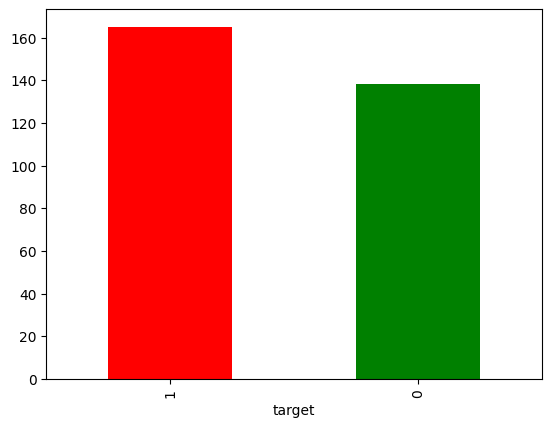

In [7]:
df['target'].value_counts().plot(kind='bar',color=['red','green'])


In [8]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.sex.value_counts()

,count
sex,
1,207
0,96


In [11]:
len(df)

303

In [12]:
pd.crosstab(df.age,df.sex)

sex,0,1
age,,
29,0,1
34,1,1
35,1,3
37,1,1
38,0,3
39,2,2
40,0,3
41,4,6
42,2,6


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

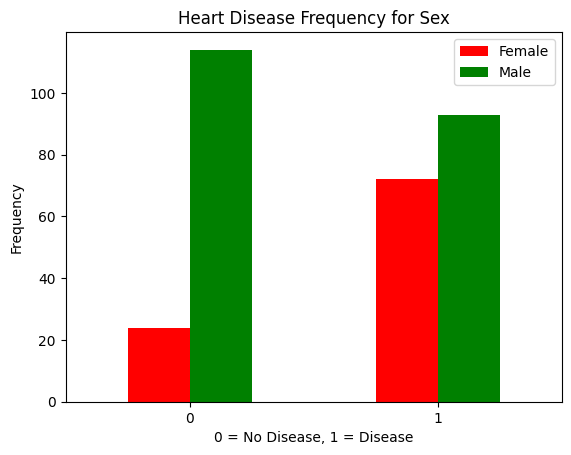

In [13]:
pd.crosstab(df.target,df.sex).plot(kind='bar',color=['red','green'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Frequency')
plt.legend(['Female','Male'])
plt.xticks(rotation=0)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151]),
 [Text(0, 0, '126'),
  Text(1, 0, '131'),
  Text(2, 0, '141'),
  Text(3, 0, '149'),
  Text(4, 0, '157'),
  Text(5, 0, '160'),
  Text(6, 0, '16

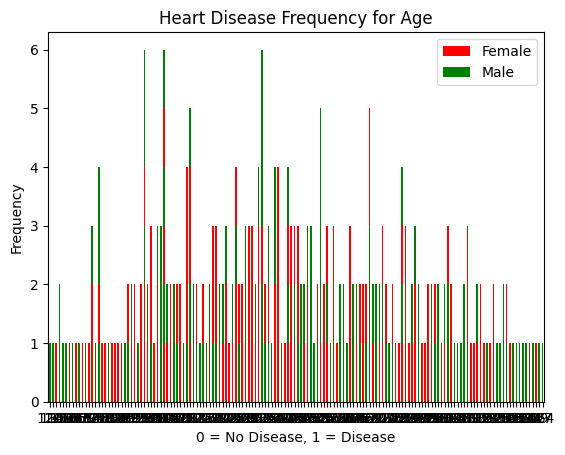

In [14]:
pd.crosstab(df.chol,df.age).plot(kind='bar',stacked=True,color=['red','green'])
plt.title('Heart Disease Frequency for Age')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Frequency')
plt.legend(['Female','Male'])
plt.xticks(rotation=0)


In [15]:
df.chol.value_counts()

,count
chol,
204,6
197,6
234,6
269,5
254,5
...,...
284,1
224,1
167,1


Text(0, 0.5, 'Cholestrol')

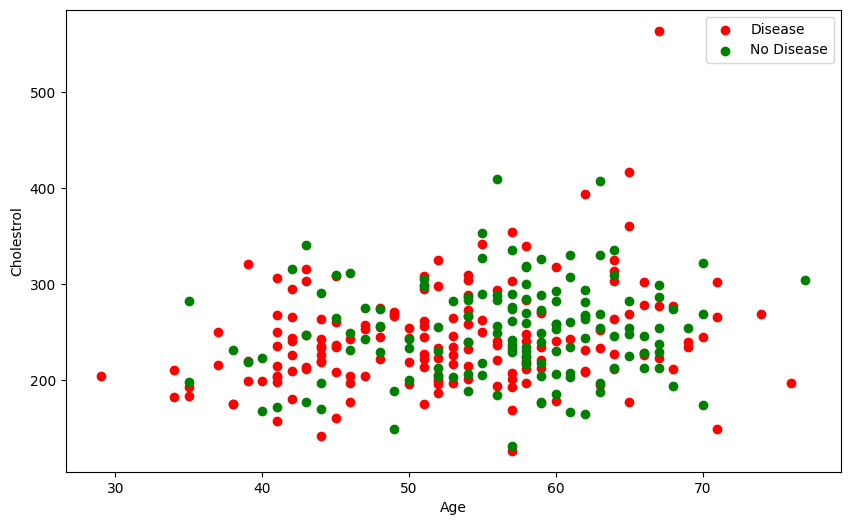

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],df.chol[df.target==1],color='red')
plt.scatter(df.age[df.target==0],df.chol[df.target==0],color='green')
plt.legend(['Disease','No Disease'])
plt.xlabel('Age')
plt.ylabel('Cholestrol')

In [17]:
df['cp'].value_counts()
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

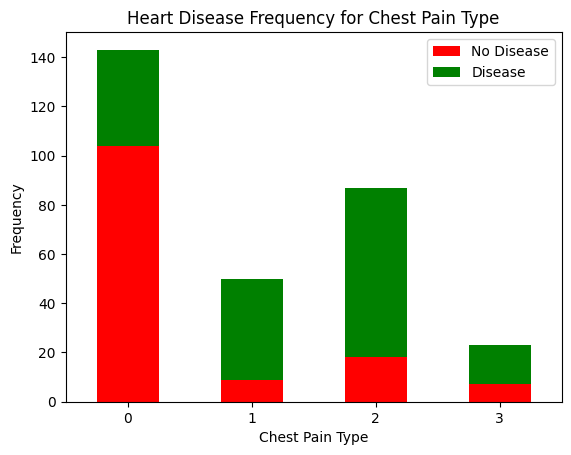

In [18]:
pd.crosstab(df['cp'],df.target).plot(kind='bar',stacked=True,color=['red','green'])
plt.title('Heart Disease Frequency for Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.legend(['No Disease','Disease'])
plt.xticks(rotation=0)
#

In [19]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


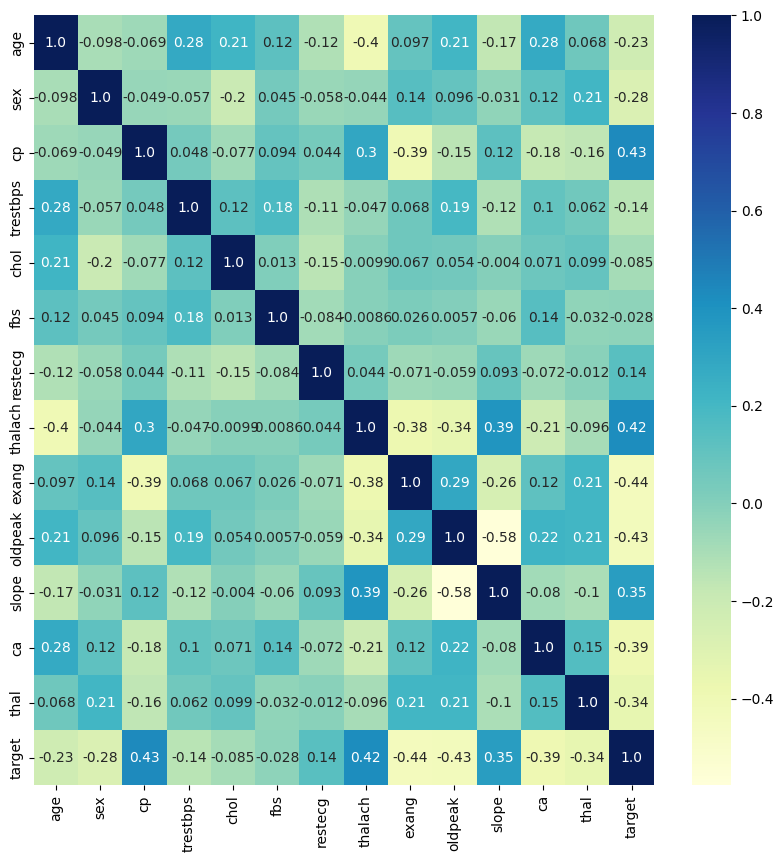

In [20]:
cor_map=df.corr()
home,room=plt.subplots(figsize=(10,10))
room=sns.heatmap(cor_map,annot=True,cbar=True,fmt='0.2',cmap='YlGnBu')


In [21]:
x=df.drop('target',axis=1)
y=df['target']
np.random.seed(7)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
#

In [22]:
len(x)

303

In [23]:
models={"KNN":KNeighborsClassifier(),
        "RNN":RandomForestClassifier(),
        "LG":LogisticRegression()}
def fit_and_score(models,x_train,x_test,y_train,y_test):
  np.random.seed(42)
  model_scores={}
  for name,model in models.items():
    model.fit(x_train,y_train)
    model_scores[name]=model.score(x_test,y_test)
  return model_scores

In [24]:
model_scores=fit_and_score(models=models,
                          x_train= x_train,
                          x_test= x_test,
                           y_train=y_train,
                           y_test=y_test)
model_scores
#

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6973684210526315, 'RNN': 0.8157894736842105, 'LG': 0.881578947368421}

<Axes: >

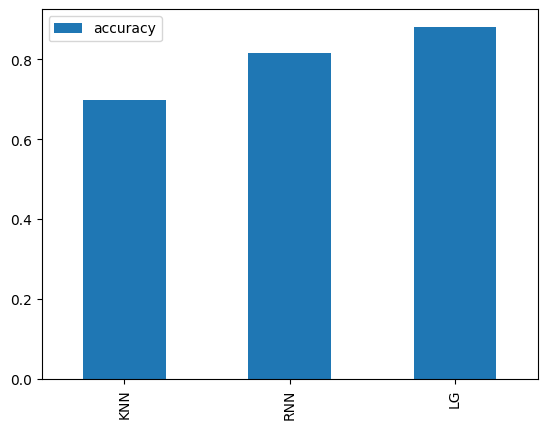

In [25]:
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare.T.plot.bar()
#

In [26]:
KNN=KNeighborsClassifier()

In [27]:
KNN.set_params()

KNeighborsClassifier()

In [28]:
train_scores=[]
test_scores=[]
neighbors=range(1,30)
for i in range(1,20):
  KNN.set_params(n_neighbors=i)
  KNN.fit(x_train,y_train)
  train_scores.append(KNN.score(x_train,y_train))
  test_scores.append(KNN.score(x_test,y_test))


In [29]:
train_scores

[1.0,
 0.7929515418502202,
 0.7709251101321586,
 0.7444933920704846,
 0.7577092511013216,
 0.73568281938326,
 0.7268722466960352,
 0.7136563876651982,
 0.7224669603524229,
 0.7136563876651982,
 0.7312775330396476,
 0.7136563876651982,
 0.7092511013215859,
 0.6960352422907489,
 0.6960352422907489,
 0.6784140969162996,
 0.6960352422907489,
 0.6607929515418502,
 0.6916299559471366]

In [30]:
test_scores

[0.6052631578947368,
 0.6052631578947368,
 0.6710526315789473,
 0.6973684210526315,
 0.6973684210526315,
 0.7105263157894737,
 0.7236842105263158,
 0.7236842105263158,
 0.7105263157894737,
 0.7368421052631579,
 0.75,
 0.7105263157894737,
 0.7105263157894737,
 0.6973684210526315,
 0.6842105263157895,
 0.7236842105263158,
 0.7236842105263158,
 0.7236842105263158,
 0.7368421052631579]

In [31]:
print("Length of neigbours:",len(neighbors))
print("Length of train scores:",len(train_scores))
print("Length of test scores:",len(test_scores))

Length of neigbours: 29
Length of train scores: 19
Length of test scores: 19


In [32]:
LR_hp={"C":np.logspace(-4,4,20),
"solver":["liblinear"]}
RFC_hp={
    "n_estimators":np.arange(50,100),
    "max_depth":[None,3,5,6,10],

   # "min_samples_split":np.arange(2,20),
    "min_samples_leaf":np.arange(1,20)
}


In [33]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

np.random.seed(7)
# Use LR_hp for LogisticRegression
rfc = RandomizedSearchCV(LogisticRegression(), param_distributions=LR_hp, cv=5, verbose=True)
rfc.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [34]:
rfc.score(x_test,y_test)

0.868421052631579

Fitting 5 folds for each of 10 candidates, totalling 50 fits


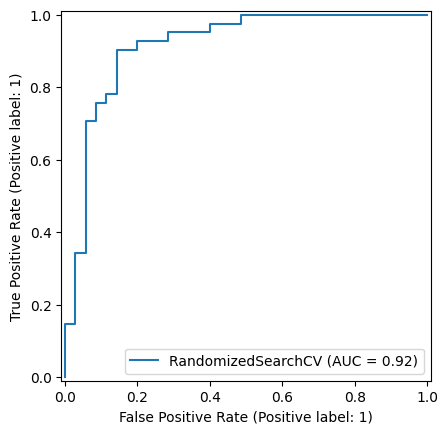

In [35]:
from sklearn.metrics import RocCurveDisplay
np.random.seed(7)

lr_gs = RandomizedSearchCV(LogisticRegression(), param_distributions=LR_hp, cv=5, verbose=True)
lr_gs.fit(x_train, y_train)


y_pred = lr_gs.predict(x_test)
RocCurveDisplay.from_estimator(lr_gs, x_test, y_test)

In [36]:
print(confusion_matrix(y_test,y_pred))

[[29  6]
 [ 4 37]]


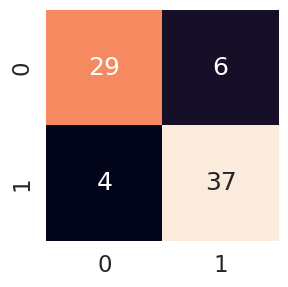

In [40]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_pred):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=False)
    plt.show() # Added this line to display the plot

# Call the function to create and display the plot
plot_conf_mat(y_test, y_pred)

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85        35
           1       0.86      0.90      0.88        41

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76



In [43]:
lr_gs.best_params_
lr=LogisticRegression(C=1.623776739188721, solver='liblinear')


In [45]:
from sklearn.model_selection import cross_val_score
cv_accuracy=cross_val_score(lr,x,y,cv=7,scoring="accuracy")
cv_accuracy=np.mean(cv_accuracy)
print(cv_accuracy)

0.8316973723950467


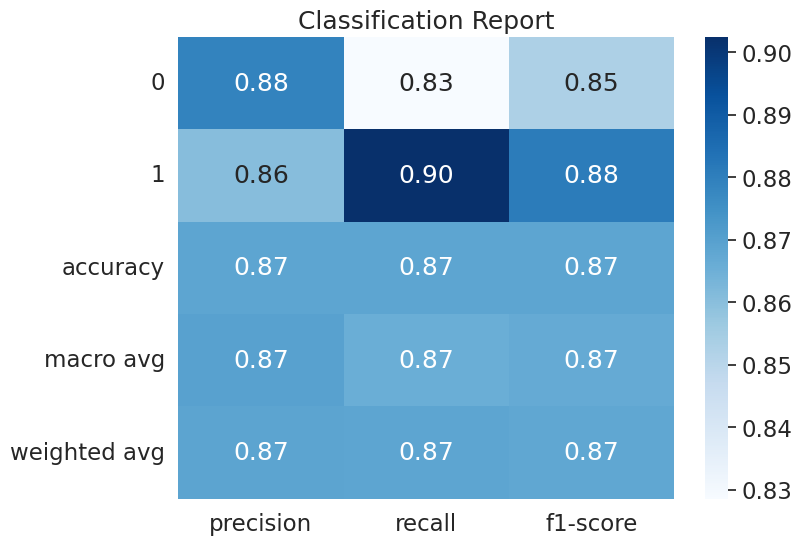

In [47]:



def plot_classification_report(y_true, y_pred, title='Classification Report', figsize=(8, 6), cmap='Blues'):
    """
    Plots the classification report as a heatmap.

    Args:
        y_true: True labels.
        y_pred: Predicted labels.
        title: Title of the plot.
        figsize: Figure size.
        cmap: Colormap for the heatmap.
    """

    report = classification_report(y_true, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()


    report_df = report_df.drop(columns=['support'], errors='ignore')

    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(report_df, annot=True, fmt=".2f", cmap=cmap, ax=ax)
    ax.set_title(title)
    plt.show()


plot_classification_report(y_test, y_pred)